<a href="https://colab.research.google.com/github/Marina-Nabil22/Apartment-Rent-Prediction-/blob/main/CS_29.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nltk
!pip install category_encoders
!pip install --upgrade sklearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.5 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from category_encoders import CatBoostEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.model_selection import cross_val_score

from scipy import stats

from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

import nltk
from nltk import download
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('wordnet')
download('punkt')
nltk.download("stopwords")

import pickle

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#data = pd.read_csv('ApartmentRentPrediction.csv')
data = pd.read_csv('updatedApartmentRentPrediction.csv')

In [ ]:
# data['price_display'] = data['price_display'].str.replace('[^\d]', '', regex=True)

# data['price_display'] = pd.to_numeric(data['price_display'], errors='coerce')

# data['price_display'].fillna(0, inplace=True)

# data['price_display'] = data['price_display'].astype(int)



In [ ]:
# print(data['price_display'])
# print(data['price'])

In [ ]:
# print(data['price_display'].value_counts())
# print(data.head())

In [ ]:
data = data.drop('price', axis=1)
X = data.drop('price_display', axis=1)
Y = data['price_display']

#data.info()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, shuffle=True, random_state=10)

In [ ]:
# Print training data and information
print("X_train info:")
print(X_train.info())
# print("X_test info:")
# print(X_test.info())

X_train info:
<class 'pandas.core.frame.DataFrame'>
Index: 7200 entries, 5250 to 1289
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            7200 non-null   int64  
 1   category      7200 non-null   object 
 2   title         7200 non-null   object 
 3   body          7200 non-null   object 
 4   amenities     7200 non-null   object 
 5   bathrooms     7200 non-null   int64  
 6   bedrooms      7200 non-null   int64  
 7   currency      7200 non-null   object 
 8   fee           7200 non-null   object 
 9   has_photo     7200 non-null   object 
 10  pets_allowed  7200 non-null   object 
 11  price_type    7200 non-null   object 
 12  square_feet   7200 non-null   int64  
 13  address       7200 non-null   object 
 14  cityname      7200 non-null   object 
 15  state         7200 non-null   object 
 16  latitude      7200 non-null   float64
 17  longitude     7200 non-null   float64
 18  source        72

In [ ]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 7200 entries, 5250 to 1289
Series name: price_display
Non-Null Count  Dtype 
--------------  ----- 
7200 non-null   object
dtypes: object(1)
memory usage: 112.5+ KB


In [ ]:
y_train = y_train.str.replace('[^\d]', '', regex=True)

y_train= pd.to_numeric(y_train, errors='coerce')

y_train.fillna(0, inplace=True)

y_train = y_train.astype(int)

In [ ]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 7200 entries, 5250 to 1289
Series name: price_display
Non-Null Count  Dtype
--------------  -----
7200 non-null   int64
dtypes: int64(1)
memory usage: 112.5 KB


In [ ]:
X_train.describe()

,id,bathrooms,bedrooms,square_feet,latitude,longitude,time
count,7.200000e+03,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7.200000e+03
mean,5.623454e+09,1.345556,1.345556,947.807500,37.663587,-94.836046,1.574895e+09
std,7.020093e+07,0.578863,0.578863,700.737961,5.502537,15.724228,3.762102e+06
min,5.508655e+09,1.000000,1.000000,106.000000,21.315500,-158.022100,1.568744e+09
25%,5.509248e+09,1.000000,1.000000,650.000000,33.630000,-101.890400,1.568781e+09
50%,5.668610e+09,1.000000,1.000000,802.000000,38.740600,-93.938300,1.577358e+09
75%,5.668627e+09,2.000000,2.000000,1100.000000,41.257975,-82.479200,1.577359e+09
max,5.668663e+09,8.000000,8.000000,40000.000000,61.594000,-70.191600,1.577362e+09


In [ ]:
X_train.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
5250,5664597463,housing/rent/apartment,Studio apartment Elmont Dr. and Tinnin Ford Rd.,This unit is located at Elmont Dr. and Tinnin ...,none,1,1,USD,No,Thumbnail,"Cats,Dogs",Monthly,516,"3409, Mills Avenue, Bryker Woods, Austin, Trav...",Austin,TX,30.3054,-97.7497,RentLingo,1577017086
7173,5668619766,housing/rent/apartment,Five BR 304 W 14th,"This unit is located at 304 W 14th, Bloomingto...","Dishwasher,Parking,Refrigerator,Storage",3,3,USD,No,Thumbnail,none,Monthly,1850,304 W 14th,Bloomington,IN,39.1471,-86.5136,RentLingo,1577358951
2661,5664579882,housing/rent/apartment,One BR 324 S. 2nd Street,"This unit is located at 324 S. second Street, ...","Cable or Satellite,Clubhouse,Dishwasher,Garbag...",1,1,USD,No,Thumbnail,Dogs,Monthly,556,324 S 2nd St,Milwaukee,WI,43.0531,-87.9659,RentLingo,1577015783
5018,5668613635,housing/rent/apartment,One BR 1925 Monroe Drive,"This unit is located at 1925 Monroe Drive, Atl...","Parking,Pool",1,1,USD,No,Thumbnail,"Cats,Dogs",Monthly,675,1925 Monroe Dr,Atlanta,GA,33.8077,-84.3753,RentLingo,1577358546
3969,5668618795,housing/rent/apartment,Studio apartment 5525 Ellsworth Avenue,"This unit is located at 5525 Ellsworth Avenue,...","Parking,Refrigerator",1,1,USD,No,Thumbnail,Cats,Monthly,410,5525 Ellsworth Ave,Pittsburgh,PA,40.4448,-79.9725,RentLingo,1577358882


In [ ]:
print(X_train.isnull().sum())

id              0
category        0
title           0
body            0
amenities       0
bathrooms       0
bedrooms        0
currency        0
fee             0
has_photo       0
pets_allowed    0
price_type      0
square_feet     0
address         0
cityname        0
state           0
latitude        0
longitude       0
source          0
time            0
dtype: int64


In [ ]:
X_train.duplicated().sum()

0

In [ ]:
X_train['address'].nunique()

5755

In [ ]:
X_train['address'].value_counts()

address
3409, Mills Avenue, Bryker Woods, Austin, Travis County, Texas, 78703, United States                                  34
South Pipeline Road, Euless, Tarrant County, Texas, 76040, United States                                              25
Beacon Way, The Beacon, Jersey City, Hudson County, New Jersey, 07306, United States                                  25
Crabtree Creek Trail, Green Acres, Raleigh, Wake County, North Carolina, 27608, United States                         16
Newark Street Northwest, Northwest, Cleveland Park, Ward 3, Washington, District of Columbia, 20016, United States    16
                                                                                                                      ..
130 Waterman St                                                                                                        1
735 NW 60th St                                                                                                         1
404 N Horne St #D45     

In [ ]:
#replacing the null values:

#replacing with none as null here has meaning of not having those features
X_train['pets_allowed'].fillna('none', inplace=True)
X_train['amenities'].fillna('none', inplace=True)

#replacing with mode even if numeric as it is descrete and not continuous
X_train['bathrooms'] = X_train['bathrooms'].fillna(X_train['bathrooms'].mode().iloc[0])
X_train['bedrooms'] = X_train['bedrooms'].fillna(X_train['bedrooms'].mode().iloc[0])
#replacing float with int for logical reasons and data integrity
X_train['bathrooms'] = X_train['bathrooms'].astype(int)
X_train['bedrooms'] = X_train['bathrooms'].astype(int)

#replacing categorical data with mode
#data['cityname'] = data['cityname'].fillna(data['cityname'].mode().iloc[0])
#data['state'] = data['state'].fillna(data['state'].mode().iloc[0])

#replacing continuous data with mean
X_train['latitude'] = X_train['latitude'].fillna(X_train['latitude'].mean())
X_train['longitude'] = X_train['longitude'].fillna(X_train['longitude'].mean())

#doesn't make sense to me: the number of unique addresses is large and the highest repetition is only 3 -> replacing all the null values with it will break the integrity of the data and have 3000 listing with the same address

#data['address'] = data['address'].fillna(data['address'].mode().iloc[0])
#data['address'].fillna('Unknown', inplace=True)

In [ ]:
print(X_train.isnull().sum())

id              0
category        0
title           0
body            0
amenities       0
bathrooms       0
bedrooms        0
currency        0
fee             0
has_photo       0
pets_allowed    0
price_type      0
square_feet     0
address         0
cityname        0
state           0
latitude        0
longitude       0
source          0
time            0
dtype: int64


In [ ]:
# def reverse_geocode(latitude, longitude):
#     geolocator = Nominatim(user_agent="reverse_geocoding", timeout=90)
#     max_retries = 3
#     retries = 0
#     while retries < max_retries:
#         try:
#             location = geolocator.reverse((latitude, longitude), language='en')
#             return location.address
#         except GeocoderTimedOut:
#             retries += 1
#             print(f"Geocoder timed out. Retrying... Attempt {retries}/{max_retries}")
#     print("Max retries exceeded. Unable to geocode.")
#     return None

# null_address_rows = X_train[X_train['address'].isnull()]

# batch_size = 100
# for i in range(0, len(null_address_rows), batch_size):
#     batch_data = null_address_rows.iloc[i:i+batch_size]
#     for index, row in batch_data.iterrows():
#         latitude = row['latitude']
#         longitude = row['longitude']
#         address = reverse_geocode(latitude, longitude)
#         if address:
#             X_train.at[index, 'address'] = address
#             print(f"New address added at index {index}: {address}")

In [ ]:
# preprocessing  body coulmn

def preprocessing_body(X_train):
  pattern = r'is located at\s*.*?,(.*?),'

  # Extract city names
  city_name_from_body = X_train['body'].str.extract(pattern)
  city_name_from_body = np.array(city_name_from_body)
  city_name_from_body_series = pd.Series(city_name_from_body.flatten())

  #print(city_name_from_body_series)
  #print(X_train['cityname'].isnull().sum())
  X_train['cityname'].fillna(city_name_from_body_series, inplace = True)
  #print(X_train['cityname'].isnull().sum())
  X_train['cityname'] = X_train['cityname'].fillna(X_train['cityname'].mode().iloc[0])
  #print(X_train['cityname'].isnull().sum())

  #Extract state
  pat = r'(\b[A-Z]{2}\b)'
  state_from_body = X_train['body'].str.extractall(pat)
  state_from_body = np.array(state_from_body)
  state_from_body_series = pd.Series(state_from_body.flatten())
  X_train['state'].fillna(state_from_body_series, inplace=True)

  #print(state_from_body_series.notnull())
  #print(X_train['state'].isnull().sum())
  X_train['state'].fillna(X_train['state'].mode().iloc[0], inplace=True)
  #print(X_train['state'].isnull().sum())

preprocessing_body(X_train)

In [ ]:
print(X_train.isnull().sum())

id              0
category        0
title           0
body            0
amenities       0
bathrooms       0
bedrooms        0
currency        0
fee             0
has_photo       0
pets_allowed    0
price_type      0
square_feet     0
address         0
cityname        0
state           0
latitude        0
longitude       0
source          0
time            0
dtype: int64


In [ ]:
bathrooms_mode = X_train['bathrooms'].mode().iloc[0]
bedrooms_mode = X_train['bedrooms'].mode().iloc[0]
longitude_mean = X_train['longitude'].mean()
latitude_mean = X_train['latitude'].mean()
cityname_mode = X_train['cityname'].mode().iloc[0]
state_mode = X_train['state'].mode().iloc[0]

In [ ]:
X_train['address'].nunique()

5755

In [ ]:
X_train['address'].value_counts() #compare the difference before and after replacing null with mode to understand note

address
3409, Mills Avenue, Bryker Woods, Austin, Travis County, Texas, 78703, United States                                  34
South Pipeline Road, Euless, Tarrant County, Texas, 76040, United States                                              25
Beacon Way, The Beacon, Jersey City, Hudson County, New Jersey, 07306, United States                                  25
Crabtree Creek Trail, Green Acres, Raleigh, Wake County, North Carolina, 27608, United States                         16
Newark Street Northwest, Northwest, Cleveland Park, Ward 3, Washington, District of Columbia, 20016, United States    16
                                                                                                                      ..
130 Waterman St                                                                                                        1
735 NW 60th St                                                                                                         1
404 N Horne St #D45     

In [ ]:
X_train['pets_allowed'].nunique()

4

In [ ]:
X_train['pets_allowed'].value_counts()

pets_allowed
Cats,Dogs    3774
none         3005
Cats          324
Dogs           97
Name: count, dtype: int64

In [ ]:
X_train['amenities'].nunique()

1784

In [ ]:
X_train['cityname'].nunique()

1345

In [ ]:
X_train['cityname'].value_counts()

cityname
Austin          447
Dallas          160
Houston         143
San Antonio     139
Los Angeles     122
               ... 
Webster           1
Brook Park        1
Mosinee           1
Weatogue          1
Millersville      1
Name: count, Length: 1345, dtype: int64

In [ ]:
X_train['has_photo'].nunique()

3

In [ ]:
X_train['has_photo'].value_counts()

has_photo
Thumbnail    6414
Yes           650
No            136
Name: count, dtype: int64

In [ ]:
X_train['price_type'].nunique()

3

In [ ]:
X_train['price_type'].value_counts()

price_type
Monthly           7198
Monthly|Weekly       1
Weekly               1
Name: count, dtype: int64

In [ ]:
X_train['currency'].nunique()

1

In [ ]:
X_train['category'].nunique()

2

In [ ]:
X_train['category'].value_counts()

category
housing/rent/apartment     7198
housing/rent/short_term       2
Name: count, dtype: int64

In [ ]:
X_train['fee'].value_counts()

fee
No    7200
Name: count, dtype: int64

In [ ]:
X_train['state'].nunique()

50

In [ ]:
X_train['state'].value_counts()

state
TX    1349
CA     684
WA     382
NC     318
MD     306
GA     275
NJ     270
CO     236
FL     230
OH     220
IL     214
WI     202
IN     175
MO     173
OR     157
MN     155
VA     143
PA     134
IA     132
OK     123
MI     119
MA     105
AZ      96
NV      91
ND      77
NE      74
CT      73
TN      71
UT      58
DC      55
NY      54
KS      53
SC      51
NH      49
SD      45
LA      45
AL      39
AR      37
AK      32
KY      32
ID      12
VT      12
NM       8
RI       8
HI       6
MS       6
MT       6
DE       4
WV       3
WY       1
Name: count, dtype: int64

In [ ]:
X_train['source'].nunique()

11

In [ ]:
X_train['source'].value_counts()

source
RentLingo            4974
RentDigs.com         1991
ListedBuy             130
RealRentals            49
GoSection8             21
Listanza               18
RENTOCULAR             13
rentbits                1
tenantcloud             1
RENTCafé                1
Real Estate Agent       1
Name: count, dtype: int64

In [ ]:
X_train['body'].nunique() #almost each single body is different

7179

In [ ]:
X_train['title'].nunique() #almot all are different

6779

In [ ]:
# Define regular expressions to extract data
bedroom_pattern = re.compile(r'(one|two|three|four|five|six|seven|eight|nine|ten)\s*BR', re.IGNORECASE)
address_pattern = re.compile(r'\d+(\s+\w+)+')

bedrooms_from_title = []
addresses_from_title = []

for title in data['title']:
    # Extract number of bedrooms
    bedroom_match = bedroom_pattern.search(title)
    if bedroom_match:
        bedrooms_from_title.append(bedroom_match.group())
    else:
        bedrooms_from_title.append(None)

    # Extract address
    address_match = address_pattern.search(title)
    if address_match:
        addresses_from_title.append(address_match.group())
    else:
        addresses_from_title.append(None)

# Create a new DataFrame with the extracted data
extracted_data = pd.DataFrame({
    'Bedrooms From Title': bedrooms_from_title,
    'Address From Title': addresses_from_title
})

#data.drop(columns=['title'], inplace=True)

#data = pd.concat([data, extracted_data], axis=1)
# Display the first 20 rows of the extracted data DataFrame
print(extracted_data.head(20))


   Bedrooms From Title               Address From Title
0               Two BR                             None
1               One BR           640 West Wilson Street
2               One BR                2777 Sw Archer Rd
3               One BR                  542 Park Avenue
4             Three BR            2216 S Palm Grove Ave
5             Three BR                   680 Bromley Dr
6                 None                             None
7             Three BR                   1712 Donald Dr
8               One BR  2975 Blackburn St Apartment 678
9               Two BR                   290 9th Ave Sw
10                None                             None
11              One BR                     4060 N 150 W
12                None                             None
13              One BR                 2225 E Oltorf St
14                None                             None
15            Three BR                11254 SE Falco St
16              One BR                          

In [ ]:
class SafeLabelEncoder(LabelEncoder):
    def transform(self, y):
        y = np.array(y)
        # Fit label encoder and return encoded labels
        encoded_labels = []
        unseen_labels_count = 0
        for x in y:
            if x in self.classes_:
                encoded_labels.append(np.where(self.classes_ == x)[0][0])
            else:
                # If unseen label, assign a new label by incrementing the maximum label value
                unseen_labels_count += 1
                encoded_labels.append(len(self.classes_) + unseen_labels_count - 1)
        return np.array(encoded_labels)

In [ ]:
#:Label Encoding
label_encoders = {}
columns_to_label_encode = ['price_type', 'currency', 'category', 'fee']

for column in columns_to_label_encode:
    label_encoders[column] = SafeLabelEncoder()
    X_train[column] = label_encoders[column].fit_transform(X_train[column])


y_encoder = SafeLabelEncoder()
y_train = y_encoder.fit_transform(y_train)

In [ ]:
print(X_train['price_type'])

5250    0
7173    0
2661    0
5018    0
3969    0
       ..
4829    0
7291    0
1344    0
7293    0
1289    0
Name: price_type, Length: 7200, dtype: int64


In [ ]:
X_train['category'].value_counts()

category
0    7198
1       2
Name: count, dtype: int64

In [ ]:
def encoding_categorical_data(X_train):
  columns_to_one_hot_encoded = ['has_photo', 'source']

  #grouping the other sources below the top two into single category 'Other'

  source_counts = X_train['source'].value_counts()

  top_two = source_counts.head(2).index.tolist()

  mask = ~X_train['source'].isin(top_two)

  X_train.loc[mask, 'source'] = 'Other'

  encoded_dfs = []
  for column in columns_to_one_hot_encoded:

      one_hot_encoded = pd.get_dummies(X_train[column])
      one_hot_encoded = one_hot_encoded.astype(int)
      encoded_dfs.append(one_hot_encoded)

  encoded_data = pd.concat([X_train] + encoded_dfs, axis=1)
  encoded_data.drop(columns=columns_to_one_hot_encoded, axis=1, inplace=True)
  X_train = encoded_data


  one_hot_encoded1 = X_train['pets_allowed'].str.get_dummies(sep=',')


  X_train = pd.concat([X_train, one_hot_encoded1], axis=1)
  X_train.drop('pets_allowed', axis=1, inplace=True)


  one_hot_encoded2 = X_train['amenities'].str.get_dummies(sep=',')

  X_train = pd.concat([X_train, one_hot_encoded2], axis=1)
  X_train.drop('amenities', axis=1, inplace=True)

  print(X_train.info())

  return X_train


X_train = encoding_categorical_data(X_train)

<class 'pandas.core.frame.DataFrame'>
Index: 7200 entries, 5250 to 1289
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  7200 non-null   int64  
 1   category            7200 non-null   int64  
 2   title               7200 non-null   object 
 3   body                7200 non-null   object 
 4   bathrooms           7200 non-null   int64  
 5   bedrooms            7200 non-null   int64  
 6   currency            7200 non-null   int64  
 7   fee                 7200 non-null   int64  
 8   price_type          7200 non-null   int64  
 9   square_feet         7200 non-null   int64  
 10  address             7200 non-null   object 
 11  cityname            7200 non-null   object 
 12  state               7200 non-null   object 
 13  latitude            7200 non-null   float64
 14  longitude           7200 non-null   float64
 15  time                7200 non-null   int64  
 16  No      

In [ ]:
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7200 entries, 5250 to 1289
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  7200 non-null   int64  
 1   category            7200 non-null   int64  
 2   title               7200 non-null   object 
 3   body                7200 non-null   object 
 4   bathrooms           7200 non-null   int64  
 5   bedrooms            7200 non-null   int64  
 6   currency            7200 non-null   int64  
 7   fee                 7200 non-null   int64  
 8   price_type          7200 non-null   int64  
 9   square_feet         7200 non-null   int64  
 10  address             7200 non-null   object 
 11  cityname            7200 non-null   object 
 12  state               7200 non-null   object 
 13  latitude            7200 non-null   float64
 14  longitude           7200 non-null   float64
 15  time                7200 non-null   int64  
 16  No      

In [ ]:
for column in X_train.columns:
    print(column)

id
category
title
body
bathrooms
bedrooms
currency
fee
price_type
square_feet
address
cityname
state
latitude
longitude
time
No
Thumbnail
Yes
Other
RentDigs.com
RentLingo
Cats
Dogs
none
AC
Alarm
Basketball
Cable or Satellite
Clubhouse
Dishwasher
Doorman
Elevator
Fireplace
Garbage Disposal
Gated
Golf
Gym
Hot Tub
Internet Access
Luxury
Parking
Patio/Deck
Playground
Pool
Refrigerator
Storage
TV
Tennis
View
Washer Dryer
Wood Floors
none


In [ ]:
y_train = pd.DataFrame(y_train, columns=['price_display'])

# Now you can use value_counts() method
print(y_train['price_display'].value_counts())

price_display
560     66
676     59
640     59
233     57
434     57
        ..
1449     1
54       1
208      1
1270     1
1303     1
Name: count, Length: 1489, dtype: int64


In [ ]:
X_train['body'] = X_train['body'].astype(str)
stop_words = set(stopwords.words('english'))

def preprocess(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word.lower() for word in tokens if word.isalpha()]
    filtered_tokens = [word for word in filtered_tokens if word not in stop_words]
    return " ".join(filtered_tokens)

preprocessed_corpus = [preprocess(row) for row in X_train['body']]

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_corpus)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print(tfidf_df)


      aace  abbey  abbeybille  abbott  abbotts  abc  aberdeen  abide  abilene  \
0      0.0    0.0         0.0     0.0      0.0  0.0       0.0    0.0      0.0   
1      0.0    0.0         0.0     0.0      0.0  0.0       0.0    0.0      0.0   
2      0.0    0.0         0.0     0.0      0.0  0.0       0.0    0.0      0.0   
3      0.0    0.0         0.0     0.0      0.0  0.0       0.0    0.0      0.0   
4      0.0    0.0         0.0     0.0      0.0  0.0       0.0    0.0      0.0   
...    ...    ...         ...     ...      ...  ...       ...    ...      ...   
7195   0.0    0.0         0.0     0.0      0.0  0.0       0.0    0.0      0.0   
7196   0.0    0.0         0.0     0.0      0.0  0.0       0.0    0.0      0.0   
7197   0.0    0.0         0.0     0.0      0.0  0.0       0.0    0.0      0.0   
7198   0.0    0.0         0.0     0.0      0.0  0.0       0.0    0.0      0.0   
7199   0.0    0.0         0.0     0.0      0.0  0.0       0.0    0.0      0.0   

      ability  ...  zipcar 

In [ ]:
word_scores = tfidf_df.sum()
sorted_words = word_scores.sort_values(ascending=False)
N = 60
top_n_words = sorted_words.head(N)
print("Top", N, "most important words:")
print(top_n_words)

Top 60 most important words:
available     487.321045
range         481.211032
rates         473.964654
rental        470.907855
units         451.581014
unit          449.502632
rent          446.477656
located       442.545698
beds          431.910209
apartment     308.922511
one           291.793091
two           254.456530
features      245.902710
include       243.666641
txmonthly     223.068920
fitness       185.904667
balcony       180.911119
deck          180.511179
three         173.663574
street        157.383036
bedrooms      152.879513
bd            149.762652
amenities     147.278462
studio        145.885943
austin        137.100679
st            135.477588
camonthly     135.360344
ave           125.761273
square        120.928639
sheltered     116.776323
apartments    109.875616
community     106.668892
drive         104.974107
bus           102.611321
air            98.655362
living         98.091528
surface        94.992563
controlled     93.092976
laundry        92.936

In [ ]:
word = 'available'
X_train['available'] = X_train['body'].apply(lambda x: 1 if word in x else 0)
X_train['available']

word = 'community'
X_train['community'] = X_train['body'].apply(lambda x: 1 if word in x else 0)
X_train['community']

word = 'features'
X_train['features'] = X_train['body'].apply(lambda x: 1 if word in x else 0)
X_train['features']

word = 'include'
X_train['include'] = X_train['body'].apply(lambda x: 1 if word in x else 0)
X_train['include']


print(f"Length of X_train: {len(X_train)}")

Length of X_train: 7200


In [ ]:
import pandas as pd
from category_encoders import CatBoostEncoder

# Reset indexes of X_train and y_train
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

cat_encoder = CatBoostEncoder()

columns_to_target_encode = ['state', 'cityname', 'body', 'title', 'address']

cat_encoder.fit(X_train[columns_to_target_encode], y_train)

encoded_data = cat_encoder.transform(data[columns_to_target_encode])

X_train[columns_to_target_encode] = encoded_data


In [ ]:
print(X_train['cityname'])

0        531.422132
1        743.421929
2        489.392083
3        323.214928
4       1173.838831
           ...     
7195     866.647031
7196     520.591911
7197     484.871648
7198     294.044062
7199     976.529375
Name: cityname, Length: 7200, dtype: float64


In [ ]:
print(X_train.columns)
print(y_train)

Index(['id', 'category', 'title', 'body', 'bathrooms', 'bedrooms', 'currency',
       'fee', 'price_type', 'square_feet', 'address', 'cityname', 'state',
       'latitude', 'longitude', 'time', 'No', 'Thumbnail', 'Yes', 'Other',
       'RentDigs.com', 'RentLingo', 'Cats', 'Dogs', 'none', 'AC', 'Alarm',
       'Basketball', 'Cable or Satellite', 'Clubhouse', 'Dishwasher',
       'Doorman', 'Elevator', 'Fireplace', 'Garbage Disposal', 'Gated', 'Golf',
       'Gym', 'Hot Tub', 'Internet Access', 'Luxury', 'Parking', 'Patio/Deck',
       'Playground', 'Pool', 'Refrigerator', 'Storage', 'TV', 'Tennis', 'View',
       'Washer Dryer', 'Wood Floors', 'none', 'available', 'community',
       'features', 'include'],
      dtype='object')
      price_display
0               357
1              1238
2               560
3               560
4               313
...             ...
7195            624
7196            263
7197            228
7198            115
7199            260

[7200 rows x 1 column

In [ ]:
#outlier detection:
# z_scores = np.abs(stats.zscore(data))
# threshold = 4
# outlier_rows = np.any(z_scores > threshold, axis=1)
# data[outlier_rows].shape

In [ ]:
# data = data[~outlier_rows]

In [ ]:
# columns_to_normalize = ['id', 'title', 'body','square_feet','bathrooms', 'bedrooms', 'latitude', 'longitude', 'time', 'price', 'address', 'cityname', 'state']
# scaler = MinMaxScaler()
# data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])
# data.head()

In [ ]:
#print(data['state'])
#data = pd.DataFrame(data)
print(X_train.head())

           id  category      title       body  bathrooms  bedrooms  currency  \
0  5664597463         0  618.17625  618.17625          1         1         0   
1  5668619766         0  618.17625  618.17625          3         3         0   
2  5664579882         0  618.17625  618.17625          1         1         0   
3  5668613635         0  618.17625  618.17625          1         1         0   
4  5668618795         0  618.17625  618.17625          1         1         0   

   fee  price_type  square_feet  ...  TV  Tennis  View  Washer Dryer  \
0    0           0          516  ...   0       0     0             0   
1    0           0         1850  ...   0       0     0             0   
2    0           0          556  ...   0       0     0             0   
3    0           0          675  ...   0       0     0             0   
4    0           0          410  ...   0       0     0             0   

   Wood Floors  none  available  community  features  include  
0            0     1  

In [ ]:
# X = data.drop('price', axis=1)
# X = X.drop('price_display', axis=1)
# Y = data['price_display']

In [ ]:
print(X_train.columns)
print(y_train)

Index(['id', 'category', 'title', 'body', 'bathrooms', 'bedrooms', 'currency',
       'fee', 'price_type', 'square_feet', 'address', 'cityname', 'state',
       'latitude', 'longitude', 'time', 'No', 'Thumbnail', 'Yes', 'Other',
       'RentDigs.com', 'RentLingo', 'Cats', 'Dogs', 'none', 'AC', 'Alarm',
       'Basketball', 'Cable or Satellite', 'Clubhouse', 'Dishwasher',
       'Doorman', 'Elevator', 'Fireplace', 'Garbage Disposal', 'Gated', 'Golf',
       'Gym', 'Hot Tub', 'Internet Access', 'Luxury', 'Parking', 'Patio/Deck',
       'Playground', 'Pool', 'Refrigerator', 'Storage', 'TV', 'Tennis', 'View',
       'Washer Dryer', 'Wood Floors', 'none', 'available', 'community',
       'features', 'include'],
      dtype='object')
      price_display
0               357
1              1238
2               560
3               560
4               313
...             ...
7195            624
7196            263
7197            228
7198            115
7199            260

[7200 rows x 1 column

In [ ]:
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200 entries, 0 to 7199
Data columns (total 57 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  7200 non-null   int64  
 1   category            7200 non-null   int64  
 2   title               7200 non-null   float64
 3   body                7200 non-null   float64
 4   bathrooms           7200 non-null   int64  
 5   bedrooms            7200 non-null   int64  
 6   currency            7200 non-null   int64  
 7   fee                 7200 non-null   int64  
 8   price_type          7200 non-null   int64  
 9   square_feet         7200 non-null   int64  
 10  address             7200 non-null   float64
 11  cityname            7200 non-null   float64
 12  state               7200 non-null   float64
 13  latitude            7200 non-null   float64
 14  longitude           7200 non-null   float64
 15  time                7200 non-null   int64  
 16  No    

In [ ]:
# from sklearn.feature_selection import SelectKBest, chi2
# from sklearn.feature_selection import f_classif
# k = 5
# selector = SelectKBest(score_func=f_classif, k=k)
# selector.fit(X_train, y_train)
# X_selected = selector.transform(X_train)

# # Get the indices of the selected features
# selected_feature_indices = selector.get_support(indices=True)
# selected_feature_names = X_train.columns[selected_feature_indices]

# print("Selected Features:", selected_feature_names)

id                   -0.074965
category             -0.023351
title                -0.012330
body                  0.010139
bathrooms             0.424248
bedrooms              0.424248
currency                   NaN
fee                        NaN
price_type           -0.003968
square_feet           0.361372
address               0.002441
cityname             -0.004609
state                -0.003734
latitude              0.068242
longitude            -0.185505
time                 -0.075895
No                    0.034354
Thumbnail            -0.052123
Yes                   0.040400
Other                 0.004952
RentDigs.com          0.071917
RentLingo            -0.071508
Cats                 -0.046440
Dogs                 -0.012899
none                  0.026009
AC                    0.000085
Alarm                 0.003463
Basketball           -0.046887
Cable or Satellite   -0.123382
Clubhouse            -0.061866
Dishwasher           -0.113236
Doorman               0.028091
Elevator

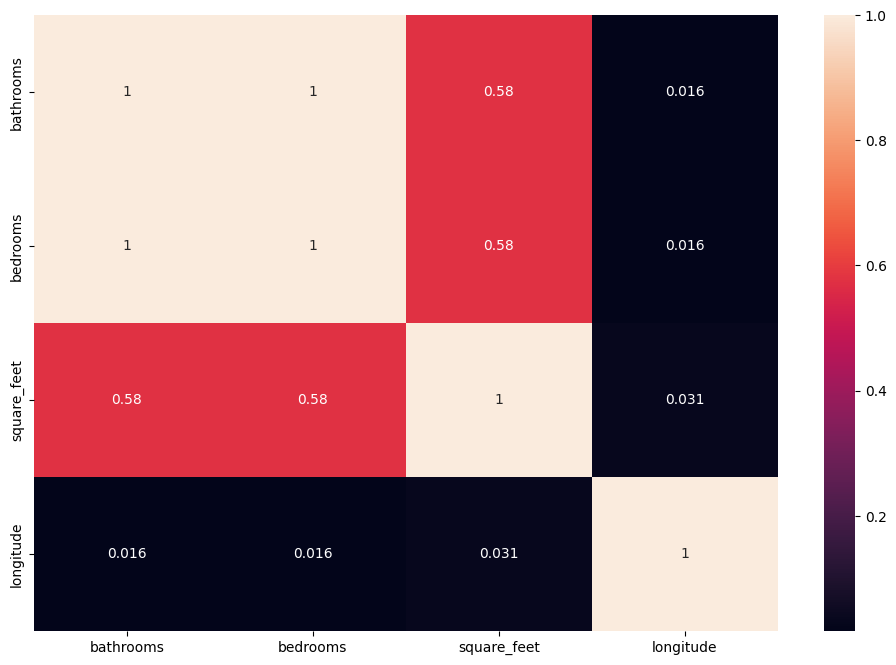

In [ ]:
corr_with_price = X_train.corrwith(y_train['price_display'])
print(corr_with_price)
#plt.subplots(figsize=(12, 8)
corr = X_train.corr()
top_features = corr_with_price.abs() > 0.16 #& (corr['price_display'].abs() < 0.9)
plt.subplots(figsize=(12, 8))
top_corr =  X_train.loc[:, top_features].corr()
sns.heatmap(top_corr, annot=True)
X_train_selected = X_train.loc[:, top_features]

X_train = X_train_selected

In [ ]:
# def selector_corr(X_train, y_train):
#     corr_with_price = X_train.corrwith(y_train['price_display'])
#     print(corr_with_price)
#     #plt.subplots(figsize=(12, 8)
#     corr = X_train.corr()
#     top_features = corr_with_price.abs() > 0.16 #& (corr['price_display'].abs() < 0.9)
#     plt.subplots(figsize=(12, 8))
#     top_corr =  X_train.loc[:, top_features].corr()
#     sns.heatmap(top_corr, annot=True)
#     X_train = X_train.loc[:, top_features]
#     return X_train

# X_train = selector_corr(X_train, y_train)

In [ ]:

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20,shuffle=True,random_state=10)
# print(X_train)
# print(y_train)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200 entries, 0 to 7199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bathrooms    7200 non-null   int64  
 1   bedrooms     7200 non-null   int64  
 2   square_feet  7200 non-null   int64  
 3   longitude    7200 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 225.1 KB


In [ ]:
# Scaling the data
#y_train= y_train.values.reshape(-1,1)
#y_test= y_test.values.reshape(-1,1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X_train)
X = pd.DataFrame(X_scaled, columns=X_train.columns)
X_train

#y_train = sc_X.fit_transform(y_train)
#y_test = sc_y.fit_transform(y_test)

,bathrooms,bedrooms,square_feet,longitude
0,1,1,516,-97.7497
1,3,3,1850,-86.5136
2,1,1,556,-87.9659
3,1,1,675,-84.3753
4,1,1,410,-79.9725
...,...,...,...,...
7195,2,2,1036,-82.7277
7196,1,1,900,-76.6126
7197,1,1,902,-117.4018
7198,1,1,250,-111.8902


In [ ]:
#multilevel linear regression - train error
multi_model = linear_model.LinearRegression()
multi_model.fit(X_train, y_train)
prediction = multi_model.predict(X_train)
print('Mean Square Error', metrics.mean_squared_error(y_train, prediction))
r2 = r2_score(y_train, prediction)
acc = r2 * 100
print('Model Accuracy', acc)

Mean Square Error 104947.09612247713
Model Accuracy 23.884093906455174


In [ ]:
#multilevel linear regression - test error
#pred = multi_model.predict(X_test)
#print('Mean Square Error', metrics.mean_squared_error(y_test, pred))
#r2 = r2_score(y_test, pred)
#acc = r2 * 100
#print('Model Accuracy', acc)

In [ ]:
# from sklearn.decomposition import PCA

# pipeline = make_pipeline(StandardScaler(), PCA(n_components=2), LinearRegression())

# pipeline.fit(X_train, y_train)

# prediction = pipeline.predict(X_train)

# # Plotting
# plt.scatter(y_train, prediction, label='Actual vs Predicted')
# plt.xlabel('Actual')
# plt.ylabel('Predicted')

# # Plot the regression line
# plt.plot(np.unique(y_train), np.poly1d(np.polyfit(y_train, prediction, 1))(np.unique(y_train)), color='red', label='Regression Line')

# plt.title('MultiLinear')
# plt.legend()
# plt.show()

In [ ]:
#hyperparameter tuning
# param_dist = {'polynomialfeatures__degree': randint(1, 10)}

# poly_reg = make_pipeline(PolynomialFeatures(), LinearRegression())

# random_search = RandomizedSearchCV(poly_reg, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=10)

# random_search.fit(X_train, y_train)

# best_degree = random_search.best_params_['polynomialfeatures__degree']
# print("Best degree value:", best_degree)

In [ ]:
#polynomial regression - train
poly_features = PolynomialFeatures(degree=3)
X_train_poly = poly_features.fit_transform(X_train)
poly_model = linear_model.LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_train_predicted = poly_model.predict(X_train_poly)
ypred=poly_model.predict(poly_features.transform(X_train))
print(ypred.size)

7200


In [ ]:
#polynomial regression - test
# y_test_pred = poly_model.predict(poly_features.fit_transform(X_test))
# print(y_test_pred.size)

In [ ]:
#polynomial regression - train
print('Mean Square Error', metrics.mean_squared_error(y_train, ypred))
r2 = r2_score(y_train, ypred)
acc = r2 * 100
print('Model Accuracy', acc)

Mean Square Error 72239.40068329875
Model Accuracy 47.60629267677026


In [ ]:
#polynomial regression - test
# print('Mean Square Error', metrics.mean_squared_error(y_test, y_test_pred))
# r2 = r2_score(y_test, y_test_pred)*100
# print('Model Accuracy', r2)

In [ ]:
#Visualize the Polynomial Regression line in 2D
# pca = PCA(n_components=2)
# X_train_pca = pca.fit_transform(X_train)


# poly_features = PolynomialFeatures(degree=2)
# X_train_pca_poly = poly_features.fit_transform(X_train_pca)
# poly_model = LinearRegression()
# poly_model.fit(X_train_pca_poly, y_train)


# plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')

# x_line = np.linspace(X_train_pca[:, 0].min(), X_train_pca[:, 0].max(), 100)
# y_line = np.linspace(X_train_pca[:, 1].min(), X_train_pca[:, 1].max(), 100)
# x_line, y_line = np.meshgrid(x_line, y_line)
# xy_line = np.column_stack((x_line.ravel(), y_line.ravel()))
# xy_line_poly = poly_features.transform(xy_line)
# z_line = poly_model.predict(xy_line_poly)
# z_line = z_line.reshape(x_line.shape)

# plt.contour(x_line, y_line, z_line, levels=20, cmap='RdGy')
# plt.colorbar(label='Predicted y')
# plt.title('Polynomial Regression in 2D (PCA)')
# plt.show()

In [ ]:
#Random Forest Regression
regressor = RandomForestRegressor(n_estimators=300, max_depth=10, min_samples_split=30, n_jobs=-1, random_state=0, oob_score=True)
regressor.fit(X_train, y_train)

<ipython-input-86-4092dd56c330>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, min_samples_split=30, n_estimators=300,
                      n_jobs=-1, oob_score=True, random_state=0)

In [ ]:
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

predictions = regressor.predict(X_train)

mse = metrics.mean_squared_error(y_train, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_train, predictions)*100
print(f'Model Accuracy: {r2}')

Out-of-Bag Score: 0.6616270319764845
Mean Squared Error: 37707.97496254106
Model Accuracy: 72.65120439467032


In [ ]:
#Decision Tree Regression

regressor_tree = DecisionTreeRegressor(min_samples_split=30, max_depth=10)
regressor_tree.fit(X_train, y_train)
y_pred = regressor_tree.predict(X_train)

print('Mean Square Error', metrics.mean_squared_error(y_train, y_pred))
r2 = r2_score(y_train, y_pred)*100
print('Model Accuracy', r2)

Mean Square Error 40075.44918635092
Model Accuracy 70.93412548199515


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=300, min_samples_split=20)
model.fit(X_train, y_train)

y_pred = model.predict(X_train)

print('Mean Square Error', metrics.mean_squared_error(y_train, y_pred))
r2 = r2_score(y_train, y_pred)*100
print('Model Accuracy', r2)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Square Error 35924.187614123184
Model Accuracy 73.94494757880354


In [ ]:
#import pickle

# Save the trained models to a file
#pkl_file = "script_reg.pkl"
with open(pkl_file, 'wb') as file:
    # pickle.dump(X_train['bathrooms'].mode().iloc[0], file)
    # pickle.dump(X_train['bedrooms'].mode().iloc[0], file)
    # pickle.dump(X_train['longitude'].mean(), file)
    # pickle.dump(X_train['latitude'].mean(), file)
    # pickle.dump(data['cityname'].mode().iloc[0], file)
    # pickle.dump(data['state'].mode().iloc[0], file)
    pickle.dump(bathrooms_mode, file)
    pickle.dump(bedrooms_mode, file)
    pickle.dump(longitude_mean, file)
    pickle.dump(latitude_mean, file)
    pickle.dump(cityname_mode, file)
    pickle.dump(state_mode, file)
    pickle.dump(preprocessing_body, file)
    pickle.dump(label_encoders, file)
    pickle.dump(y_encoder, file)
    pickle.dump(encoding_categorical_data, file)
    pickle.dump(cat_encoder, file)
    pickle.dump(scaler, file)
    pickle.dump(list(X_train_selected.columns), file)
    pickle.dump(multi_model, file)
    pickle.dump(poly_model, file)
    pickle.dump(poly_features, file)
    pickle.dump(regressor, file)
    pickle.dump(regressor_tree, file)
    pickle.dump(model, file)
    #pickle.dump(reverse_geocode, file)

test script


In [ ]:
# Load trained models from a file
import pickle
pkl_file = "script_reg.pkl"
with open(pkl_file,'rb') as file:
    pickled_bathrooms = pickle.load(file)
    pickled_bedrooms = pickle.load(file)
    pickled_longitude = pickle.load(file)
    pickled_latitude = pickle.load(file)
    pickled_cityname = pickle.load(file)
    pickled_state = pickle.load(file)
    preprocessing_body = pickle.load(file)
    pickled_label_encoders = pickle.load(file)
    pickled_y_encoder = pickle.load(file)
    pickled_encoding_categorical_data = pickle.load(file)
    pickled_cat_encoder = pickle.load(file)
    pickled_scaler = pickle.load(file)
    pickled_selector_corr = pickle.load(file)
    pickled_multi_model = pickle.load(file)
    pickled_poly_model = pickle.load(file)
    pickled_poly_features = pickle.load(file)
    pickled_regressor = pickle.load(file)
    pickled_regressor_tree = pickle.load(file)
    pickled_model = pickle.load(file)
    #pickled_reverse_geocode = pickle.load(file)

In [ ]:
data = pd.read_csv('/content/ApartmentRentPrediction_test.csv')
data = data.drop('price', axis=1)
X_test = data.drop('price_display', axis=1)
y_test = data['price_display']


In [ ]:
y_test = y_test.str.replace('[^\d]', '', regex=True)

y_test = pd.to_numeric(y_test, errors='coerce')

y_test.fillna(0, inplace=True)

y_test = y_test.astype(int)

In [ ]:
X_test['bathrooms'].fillna(pickled_bathrooms, inplace=True)
X_test['bedrooms'].fillna(pickled_bedrooms, inplace=True)
X_test['longitude'].fillna(pickled_longitude, inplace=True)
X_test['latitude'].fillna(pickled_latitude, inplace=True)
X_test['cityname'].fillna(pickled_cityname, inplace=True)
X_test['state'].fillna(pickled_state, inplace=True)
X_test['pets_allowed'].fillna('none', inplace=True)
X_test['amenities'].fillna('none', inplace=True)

X_test.isnull().sum()

id                0
category          0
title             0
body              0
amenities         0
bathrooms         0
bedrooms          0
currency          0
fee               0
has_photo         0
pets_allowed      0
price_type        0
square_feet       0
address         356
cityname          0
state             0
latitude          0
longitude         0
source            0
time              0
dtype: int64

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1000 non-null   int64  
 1   category      1000 non-null   object 
 2   title         1000 non-null   object 
 3   body          1000 non-null   object 
 4   amenities     1000 non-null   object 
 5   bathrooms     1000 non-null   float64
 6   bedrooms      1000 non-null   int64  
 7   currency      1000 non-null   object 
 8   fee           1000 non-null   object 
 9   has_photo     1000 non-null   object 
 10  pets_allowed  1000 non-null   object 
 11  price_type    1000 non-null   object 
 12  square_feet   1000 non-null   int64  
 13  address       644 non-null    object 
 14  cityname      1000 non-null   object 
 15  state         1000 non-null   object 
 16  latitude      1000 non-null   float64
 17  longitude     1000 non-null   float64
 18  source        1000 non-null  

In [ ]:
# null_address_rows = X_test[X_test['address'].isnull()]

# batch_size = 100
# for i in range(0, len(null_address_rows), batch_size):
#     batch_data = null_address_rows.iloc[i:i+batch_size]
#     for index, row in batch_data.iterrows():
#         latitude = row['latitude']
#         longitude = row['longitude']
#         address = pickled_reverse_geocode(latitude, longitude)
#         if address:
#             X_test.at[index, 'address'] = address
#             print(f"New address added at index {index}: {address}")

In [ ]:
preprocessing_body(X_test)
X_test.isnull().sum()

id                0
category          0
title             0
body              0
amenities         0
bathrooms         0
bedrooms          0
currency          0
fee               0
has_photo         0
pets_allowed      0
price_type        0
square_feet       0
address         356
cityname          0
state             0
latitude          0
longitude         0
source            0
time              0
dtype: int64

In [ ]:
columns_to_label_encode = ['price_type', 'currency', 'category', 'fee']

for column in columns_to_label_encode:
    # pickled_label_encoders[column] = LabelEncoder()
    X_test[column] = pickled_label_encoders[column].transform(X_test[column])


pickled_y_encoder.transform(y_test)

array([ 326,  980,  344,  130, 1145,  619,  458, 1124,  967,  271,  385,
        601,  624,  252,  514,  176,  172, 1348,  878, 1489, 1231,  555,
        672,  751,  191, 1367,   77, 1366,  713,  479,  233,  395, 1048,
        186,  398,  706,  236,   99,  619, 1018,   58,   82, 1490,   15,
        750,  479,  228,  103,  521,  213, 1491,  581,  652,  284,  814,
        566, 1171, 1182,  600,  277, 1492,  378, 1493,  237, 1352, 1391,
        318,  941,  710, 1153,  248,  819,  199,  172,   76,  705,  190,
        272,  960,  598,  941,  313,  213,  904,  406,  637, 1038,  868,
        751,  426, 1373,  750, 1088,  542,  298,  126, 1494,  462, 1495,
       1145,  734,  974,  434,  676,  439, 1106,  649,  583,  526,  434,
        190,  272,  429,   45, 1496,  675, 1288,  387,    8,  293,  334,
        217, 1043,  623,  581,  398,  353, 1125,  429, 1497,  200,  395,
        601,  334,  598,  796,  272, 1498,   68,  692,  191,  453,  186,
         85,  470,  601,  630,  889,  560,  514,  3

In [ ]:
X_test = pickled_encoding_categorical_data(X_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  1000 non-null   int64  
 1   category            1000 non-null   int64  
 2   title               1000 non-null   object 
 3   body                1000 non-null   object 
 4   bathrooms           1000 non-null   float64
 5   bedrooms            1000 non-null   int64  
 6   currency            1000 non-null   int64  
 7   fee                 1000 non-null   int64  
 8   price_type          1000 non-null   int64  
 9   square_feet         1000 non-null   int64  
 10  address             644 non-null    object 
 11  cityname            1000 non-null   object 
 12  state               1000 non-null   object 
 13  latitude            1000 non-null   float64
 14  longitude           1000 non-null   float64
 15  time                1000 non-null   int64  
 16  No     

In [ ]:
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

columns_to_target_encode = ['state', 'cityname', 'body', 'title', 'address']
encoded_data = pickled_cat_encoder.transform(X_test[columns_to_target_encode])
X_test[columns_to_target_encode] = encoded_data

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  1000 non-null   int64  
 1   category            1000 non-null   int64  
 2   title               1000 non-null   float64
 3   body                1000 non-null   float64
 4   bathrooms           1000 non-null   float64
 5   bedrooms            1000 non-null   int64  
 6   currency            1000 non-null   int64  
 7   fee                 1000 non-null   int64  
 8   price_type          1000 non-null   int64  
 9   square_feet         1000 non-null   int64  
 10  address             1000 non-null   float64
 11  cityname            1000 non-null   float64
 12  state               1000 non-null   float64
 13  latitude            1000 non-null   float64
 14  longitude           1000 non-null   float64
 15  time                1000 non-null   int64  
 16  No     

In [ ]:
y_test.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: price_display
Non-Null Count  Dtype
--------------  -----
1000 non-null   int64
dtypes: int64(1)
memory usage: 7.9 KB


In [ ]:
#X_test = pickled_selector_corr(X_test, y_test_df)

In [ ]:
X_test = X_test[pickled_selector_corr]

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bathrooms    1000 non-null   float64
 1   bedrooms     1000 non-null   int64  
 2   square_feet  1000 non-null   int64  
 3   longitude    1000 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 31.4 KB


In [ ]:
pickled_scaler.transform(X_test)
X_scaled = pickled_scaler.transform(X_test)
X_test = pd.DataFrame(X_scaled, columns=X_test.columns)

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bathrooms    1000 non-null   float64
 1   bedrooms     1000 non-null   float64
 2   square_feet  1000 non-null   float64
 3   longitude    1000 non-null   float64
dtypes: float64(4)
memory usage: 31.4 KB


In [ ]:
y_test.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: price_display
Non-Null Count  Dtype
--------------  -----
1000 non-null   int64
dtypes: int64(1)
memory usage: 7.9 KB


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bathrooms    1000 non-null   float64
 1   bedrooms     1000 non-null   float64
 2   square_feet  1000 non-null   float64
 3   longitude    1000 non-null   float64
dtypes: float64(4)
memory usage: 31.4 KB


In [ ]:
y_test.head()

0     965
1    1875
2     985
3     719
4    2250
Name: price_display, dtype: int64

In [ ]:
y_pred = pickled_multi_model.predict(X_test)
print('MSE multi linear: ', metrics.mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
acc = r2 * 100
print("Multi Linear Regression Model Accuracy:", acc)

X_test_poly = pickled_poly_features.transform(X_test)
y_pred = pickled_poly_model.predict(X_test_poly)
print('MSE Polynomial: ', metrics.mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
acc = r2 * 100
print("Polynomial Regression Accuracy:", acc)


y_pred = pickled_regressor.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_pred)
print(f'MSE Random Forest: {mse}')
r2 = r2_score(y_test, y_pred)*100
print(f'Random Forest Model Accuracy: {r2}')



y_pred = pickled_regressor_tree.predict(X_test)
print('MSE Decision Tree: ', metrics.mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)*100
print('Decision Tree Model Accuracy: ', r2)


y_pred = pickled_model.predict(X_test)
print('MSE GradientBoosting: ', metrics.mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)*100
print('GradientBoosting Model Accuracy: ', r2)

MSE multi linear:  3295888.059630887
Multi Linear Regression Model Accuracy: -256.7212475755776
MSE Polynomial:  351934533.7622196
Polynomial Regression Accuracy: -37990.65225432686
MSE Random Forest: 1772170.4229093418
Random Forest Model Accuracy: -91.80592081381474
MSE Decision Tree:  1676551.7227777778
Decision Tree Model Accuracy:  -81.45689761115582
MSE GradientBoosting:  2764015.4168660855
GradientBoosting Model Accuracy:  -199.15549617696132
